# NEW————qiskit.circuit.library

该库分为不同的部分：
标准门
标准指令
标准操作
广义门
算术运算
基础变化
布尔逻辑
数据编码
数据准备
特定操作
N局部电路
神谕
模板电路

https://quantum.cloud.ibm.com/docs/en/api/qiskit/circuit_library#standard-gates
## 标准门部分
标准门：这些操作是可逆幺正门，他们都是Gate的子类，它们都具有方法to_matrix()，power()和control()，这些方法通常只能应用于幺正操作
比如：H门，IGate，Rgate,Rxgate等等等等

power：返回该量子门的指数次幂

control：将一个基本的量子门转换为其受控版本（Controlled Version）。控制门是量子计算中的基本构件。它只在控制量子比特处于特定状态（通常是 |1⟩）时，才对目标量子比特执行门操作

num_ctrl_qubits：要添加的控制量子比特的数量
num_ctrl_qubits=1 → 单控制门（如 CNOT）
num_ctrl_qubits=2 → 双控制门（如 Toffoli）

In [21]:
from qiskit.circuit.library import XGate

gate = XGate()
print(gate.to_matrix())             # X gate
print(gate.power(1/2).to_matrix())
print(gate.control(1).to_matrix())  # CX (controlled X) gate返回的就是一个CNOT门

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
[[0.5+0.5j 0.5-0.5j]
 [0.5-0.5j 0.5+0.5j]]
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


## real_amplitudes
一个启发式的试探波函数（ansatz）电路，"RealAmplitudes" 的含义是：这个电路制备的量子态只有实数振幅，虚部始终为0
典型的 RealAmplitudes 结构：
[RY层] → [纠缠层] → [RY层] → [纠缠层] → ... → [最后的RY层]

参数：
num_qubits (int)：量子比特数量
entanglement (str | list)：纠缠模式，支持多种预设
reps (int)：重复次数，默认3次，每个重复包含：RY层 + 纠缠层


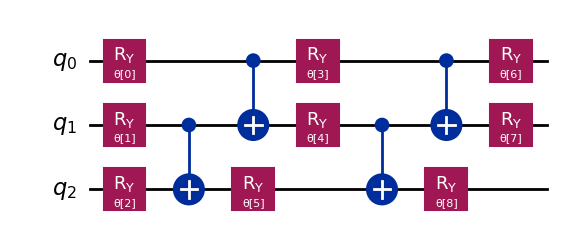

In [8]:
from qiskit.circuit.library import real_amplitudes
 
ansatz = real_amplitudes(3, reps=2, entanglement="reverse_linear")  # create the circuit on 3 qubits
ansatz.draw("mpl")

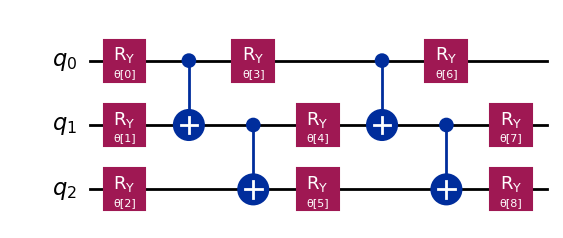

In [11]:
ansatz = real_amplitudes(3, reps=2, entanglement="linear")  # create the circuit on 3 qubits
ansatz.draw("mpl")

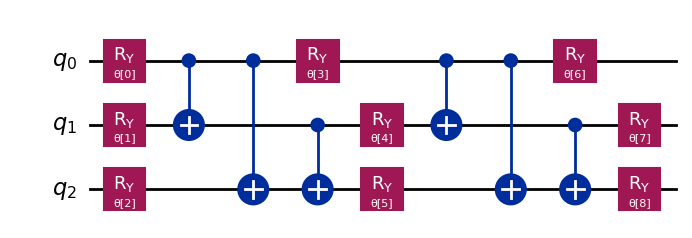

In [12]:
ansatz = real_amplitudes(3, reps=2, entanglement="full")  # create the circuit on 3 qubits
ansatz.draw("mpl")

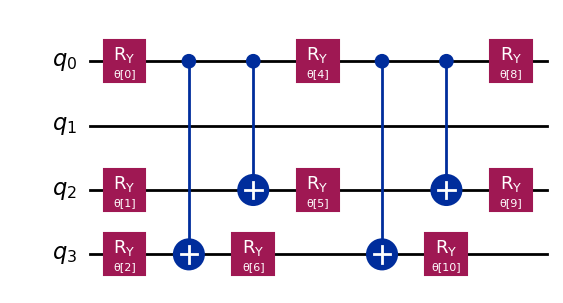

In [13]:
ansatz = real_amplitudes(4, reps=2, entanglement=[[0,3], [0,2]], skip_unentangled_qubits=True)
# 跳过未纠缠量子位上的旋转门
ansatz.draw("mpl")

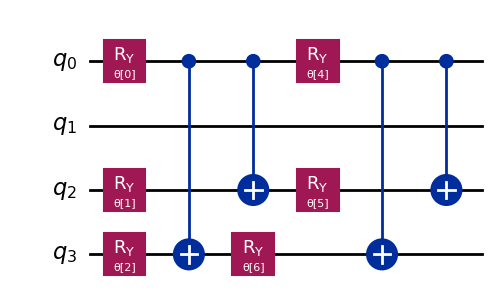

In [15]:
ansatz = real_amplitudes(4, reps=2, entanglement=[[0,3], [0,2]], skip_final_rotation_layer=True, skip_unentangled_qubits=True)
# 省略最后的旋转门
ansatz.draw("mpl")

## PhaseOracle

将高级别的布尔逻辑描述转换为低级别的量子相位翻转操作
实现 Grover 算法和其他振幅放大算法的关键组件，用于标记“好”的解。
每个变量对应一个量子比特。如：a,b,c
最终，它会构造一个能够精确实现 (−1) 的f(x)次的相位翻转的电路。
PhaseOracleGate 与其类似

In [4]:
from qiskit.circuit.library import PhaseOracle
logical_expr = '(a & b) | c'
oracle = PhaseOracle(logical_expr)

# 查看 Oracle 电路（通常很复杂，包含多控制门和辅助比特）
print("Phase Oracle circuit:")
print(oracle.draw())
print(oracle.boolean_expression.simulate("101"))
print(oracle.__dict__)

Phase Oracle circuit:
              
q_0: ─o──■──■─
      │  │  │ 
q_1: ─┼──o──■─
      │  │    
q_2: ─■──■────
              
True
{'boolean_expression': <qiskit.synthesis.boolean.boolean_expression.BooleanExpression object at 0x000001BEE222FE50>, '_base_name': 'Phase Oracle', 'name': 'Phase Oracle', '_builder_api': <qiskit.circuit.quantumcircuit._OuterCircuitScopeInterface object at 0x000001BEE37AB190>, '_op_start_times': None, '_control_flow_scopes': [], '_data': <qiskit._accelerate.circuit.CircuitData object at 0x000001BEE255AE10>, '_ancillas': [], '_layout': None, '_vars_input': {}, '_vars_capture': {}, '_vars_local': {}, '_stretches_capture': {}, '_stretches_local': {}, '_duration': None, '_unit': 'dt', '_metadata': {}}
